In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics 
#from sklearn.cross_validation import cross_val_score 
df = sm.datasets.fair.load_pandas().data



In [14]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [15]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [16]:
df['affair'] = (df.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
df, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [17]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [18]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

Since there are no null values we can proceed further. Let's try to figure out the distribution of features!

In [19]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


Above description shows that there is no zero values in any of the features except children which we can exclude. As it simply means that no. of children is zero. But above description shows that the dataset is not scaler. We need to make our dataset standarize to get better effeciency of model.

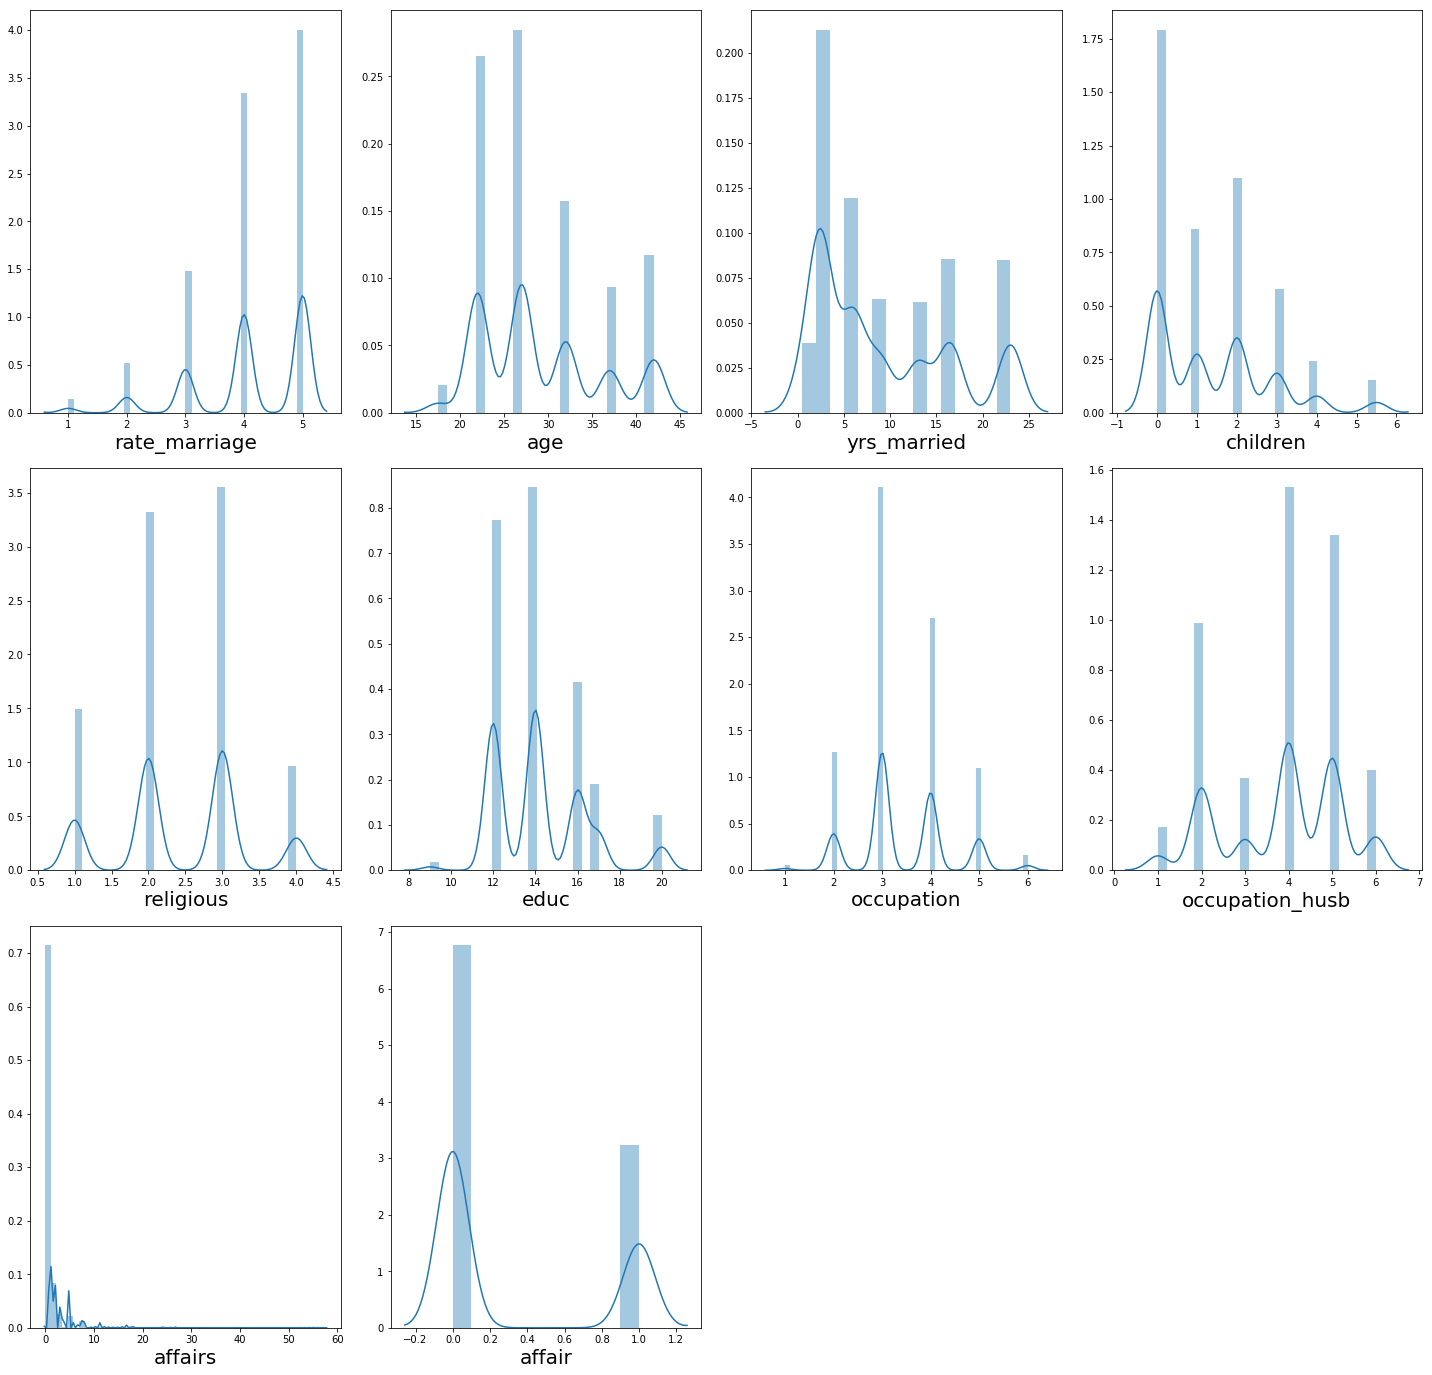

In [20]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

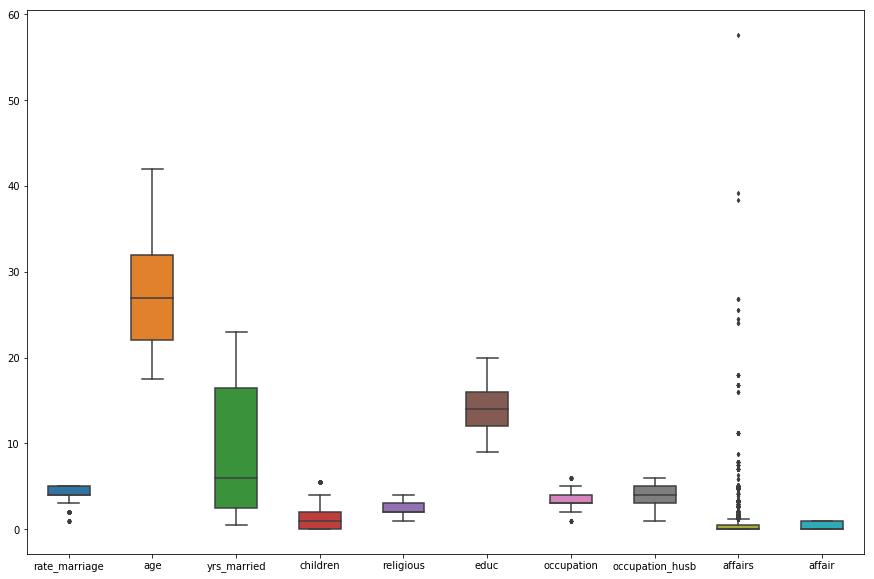

In [22]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


Boxplot shows that there are outliers in some of the features i.e. Rate_Marriage, Occupation & affairs. But in affair no. of outliers are more as compare to other columns. So let's do one thing to impore model's effeciency let's remove outliers form affairs feature!

In [34]:
q = df['affairs'].quantile(0.95)
# we are removing the top 2% data from the Pregnancies column
df = df[df['affairs']<q]

In [35]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1


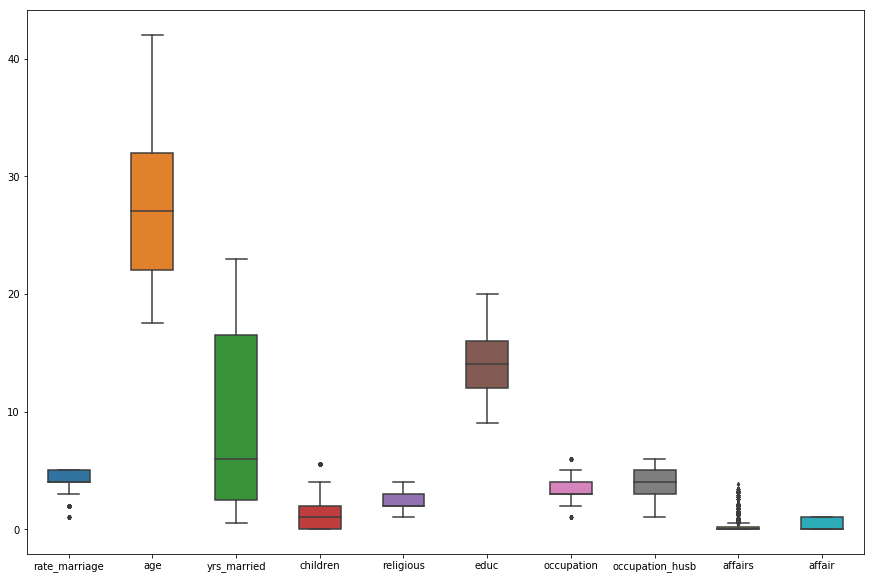

In [36]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


Great! <br>
Now we can start building ML model based on Logistic Regression. First try to check multicollinearity between features.

In [41]:
x = df.drop('affair',axis=1)
y = df['affair']

In [42]:
scaler = StandardScaler ()
X_scaled = scaler.fit_transform(x)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns
vif

,VIF,Features
0,1.104034,rate_marriage
1,5.532340,age
2,7.245042,yrs_married
3,2.514202,children
4,1.042268,religious
5,1.298540,educ
6,1.213771,occupation
7,1.082859,occupation_husb
8,1.097143,affairs


Above summary shows that there is high multicollinearity in yrs_married feature. But since this is crucial field let's try to create a model using all these features. If accuracy won't go high we will try to exclude yrs_married & age feature. <br>
Let's first break entire dataset in training & testing samples!

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [71]:
lr = LogisticRegression ()
lr.fit(X_scaled,y)
print(lr.coef_)
print(lr.intercept_)

[[-0.40864204 -0.52204075  1.17911759  0.09046827 -0.21402271  0.05137016
   0.07593068  0.02447129 16.88279586]]
[4.06319158]


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [73]:
len(y_pred)

1512

In [90]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9834656084656085

In [86]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1077,    0],
       [  25,  410]], dtype=int64)

In [88]:
True_Positive = cm [0][0]
False_Positive = cm [1][0] #Type 1 Error
True_Negative = cm [0][0]
False_Negative = cm [1][1] #Type 2 Error

In [89]:
print(True_Positive)
print(False_Positive) 
print(True_Negative)
print(False_Negative)

1077
25
1077
410


In [91]:
# Precison
Precision = True_Positive/(True_Positive+False_Positive)
Precision

0.9773139745916516

In [92]:
# Recall
Recall = True_Positive/(True_Positive+False_Negative)
Recall

0.7242770679219905

In [93]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8319814600231751

In [94]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9712643678160919

In [95]:
roc = roc_curve(y_test, y_pred)
roc

(array([0., 0., 1.]),
 array([0.        , 0.94252874, 1.        ]),
 array([2, 1, 0]))

Since we are getting a very high accuracy and other evaluation factors such as Recall, Precision & F1 Score which means that we can opt this Model. This is a very good model and we are ready to go with the deployement of this model.